# csv 파일로 광도 곡선 그리기


이 자료는 What's observable로 부터 특정한 날 관측할 수 있는 소행성의 목록을 만드는 과정을 설명합니다.

## 데이터 저장

### 데이터 저장 폴더 생성

데이터를 저장할 폴더를 "GSHS_Photometry" 라는 이름으로 생성해 보겠습니다.

* 만약 리눅스 시스템 이라면 shell 명령어로 가능한데, "!"를 붙이면 shell 명령어를 실행할 수 있습니다.
> !mkdir GSHS_Photometry

아래 코드를 실행하면 OS의 영향을 받지 않기 위하여 pathlib을 사용하여 폴더를 생성할 수 있습니다.

In [1]:
import os
from pathlib import Path
BASEPATH = Path("./")
save_dir_name = "GSHS_Photometry"
print(f"BASEPATH: {BASEPATH}")

if not (BASEPATH/save_dir_name).exists():
    os.mkdir(str(BASEPATH/save_dir_name))
    print (f"{str(BASEPATH/save_dir_name)} is created...")
else :
    print (f"{str(BASEPATH/save_dir_name)} is already exist...")

BASEPATH: .
GSHS_Photometry is already exist...


shell 명령어로 폴더가 생성되었는지 확인해 봅니다.

폴더 생성을 확인하는 또 다른 방법은 이 창 오른쪽에서 [파일] 목록을 확인해 볼 수 있습니다.

In [2]:
!ls -al

total 194700
drwxrwxr-x 13 guitar79 guitar79    20480 Dec 21 19:06  .
drwxr-xr-x 31 guitar79 guitar79     4096 Dec 18 13:16  ..
-rw-r--r--  1 guitar79 guitar79      595 Dec  9 23:53  00_00_intro.md
-rw-r--r--  1 guitar79 guitar79   347015 Dec 19 08:31  00_01_computer_and_network.ipynb
-rw-r--r--  1 guitar79 guitar79  1452024 Dec 19 08:26  00_02_Python_for_photometry.ipynb
-rw-r--r--  1 guitar79 guitar79    51565 Dec 18 21:14  00_05_Python_modules.ipynb
-rw-r--r--  1 guitar79 guitar79   103456 Dec 18 21:14  00_21_calculate_physical_quantities.ipynb
-rw-r--r--  1 guitar79 guitar79    47204 Dec 19 09:25  00_22_Astronomical_Time.ipynb
-rw-r--r--  1 guitar79 guitar79    29743 Dec 19 09:25  00_23_Astronomical_Coordinate_Systems.ipynb
-rw-r--r--  1 guitar79 guitar79 49032613 Dec 21 19:08  00_31_fits_handling_and_plate_solving.ipynb
-rw-r--r--  1 guitar79 guitar79 17061349 Dec 19 09:25  00_32_preprocessing_fits_files.ipynb
-rw-r--r--  1 guitar79 guitar79    93177 Dec 18 21:34  00_33_preprocess

### 측광 결과 다운로드

경기과학고등학교 천문대에서 CCD 측광 결과를 csv 파일로 구글 드라이브에 저장해 놓았습니다.

GNU Wget은 HTTP 통신 또는 FTP 통신을 사용해 서버에서 파일 또는 콘텐츠를 다운로드할 때 사용하는 소프트웨어입니다. Wget의 특징은 여러 파일을 한 번에 다운로드하거나 웹 페이지의 링크를 순회하며 여러 콘텐츠를 자동으로 다운로드할 때 매우 편리합니다.

MS Windows에서는 별도로 설치를 해줘야 하며,
구글 코랩도 wget을을 지원해주니 아래 셀을 실행하면 자신의 [작업 영역]에 저장됩니다. 하지만 이 파일은 이 런타임이 재실행 될때는 삭제됨에 유의하시기 바랍니다.

아래 코드를 실행하면 여러분의 작업영역에 해당 파일을 저장할 것입니다.

In [3]:
fname = "CY-AQR_result_photometry.zip"
fid = "12tblya6j6EvZIraP9EMAI5iBaOHpRR0r"

# wget을 이용(나의 구글 드라이브에서 공유한 파일을 구글 코랩에서 사용할 경우)
!wget --no-check-certificate "https://docs.google.com/uc?export=download&id={fid}" -O {save_dir_name}/{fname}

# gdown을 이용(나의 구글 드라이브에서 공유한 파일을 다운로드)
#!gdown {fid} -O {save_dir_name}/{fname}

--2024-12-21 19:12:09--  https://docs.google.com/uc?export=download&id=12tblya6j6EvZIraP9EMAI5iBaOHpRR0r
Resolving docs.google.com (docs.google.com)... 142.250.206.206, 2404:6800:400a:80e::200e
Connecting to docs.google.com (docs.google.com)|142.250.206.206|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=12tblya6j6EvZIraP9EMAI5iBaOHpRR0r&export=download [following]
--2024-12-21 19:12:09--  https://drive.usercontent.google.com/download?id=12tblya6j6EvZIraP9EMAI5iBaOHpRR0r&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.206.193, 2404:6800:400a:804::2001
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.206.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3111264 (3.0M) [application/octet-stream]
Saving to: ‘GSHS_Photometry/CY-AQR_result_photometry.zip’

GSHS_Photometry/CY- 100%[===================

### 데이터 확인

OS의 영향을 받지 않고 파이썬으로 확인하는 방법은 아래와 같이 하면 됩니다.

In [4]:
from pathlib import Path
fpaths = sorted(list((BASEPATH/save_dir_name).glob('*.zip')))
print(f"fpaths: {fpaths}")
print(f"len(fpaths): {len(fpaths)}")

fpaths: [PosixPath('GSHS_Photometry/CY-AQR_result_photometry.zip')]
len(fpaths): 1


### 압축 풀기


In [5]:
import shutil

shutil.unpack_archive(str(fpaths[0]), str(BASEPATH/save_dir_name))
print(str(fpaths[0]), "is unpacked to", str(BASEPATH/save_dir_name))

GSHS_Photometry/CY-AQR_result_photometry.zip is unpacked to GSHS_Photometry


### 압축 해제된 파일 확인

shell 명령어로 파일이 생성되었는지 확인해 보자.
역시 마찬가지로 이 창 오른쪽에서 [파일] 목록을 확인해 볼 수 있습니다.

In [6]:
fpaths = sorted(list((BASEPATH/save_dir_name).glob('*.csv')))
print(f"fpaths: {fpaths}")
print(f"len(fpaths): {len(fpaths)}")

fpaths: [PosixPath('GSHS_Photometry/ 241GERMANIA_LIGHT_R_2023-11-07-18-38-15_150sec_GSON300_STF-8300M_-19c_1bin_DAOStarfinder_fwhm_6_962.6140991386717.csv'), PosixPath('GSHS_Photometry/CY-AQR_LIGHT_R_2016-10-03-11-37-38_50sec_RiLA600_STX-16803_-20c_2bin_result_photometry.csv'), PosixPath('GSHS_Photometry/CY-AQR_LIGHT_R_2016-10-03-11-40-06_50sec_RiLA600_STX-16803_-19c_2bin_result_photometry.csv'), PosixPath('GSHS_Photometry/CY-AQR_LIGHT_R_2016-10-03-11-42-34_50sec_RiLA600_STX-16803_-19c_2bin_result_photometry.csv'), PosixPath('GSHS_Photometry/CY-AQR_LIGHT_R_2016-10-03-11-45-04_50sec_RiLA600_STX-16803_-19c_2bin_result_photometry.csv'), PosixPath('GSHS_Photometry/CY-AQR_LIGHT_R_2016-10-03-11-48-28_50sec_RiLA600_STX-16803_-20c_2bin_result_photometry.csv'), PosixPath('GSHS_Photometry/CY-AQR_LIGHT_R_2016-10-03-11-50-52_50sec_RiLA600_STX-16803_-20c_2bin_result_photometry.csv'), PosixPath('GSHS_Photometry/CY-AQR_LIGHT_R_2016-10-03-11-53-16_50sec_RiLA600_STX-16803_-19c_2bin_result_photometry.cs

## 데이터 처리하기

### csv 파일 확인하기

다음의 cat 명령어로 csv 파일의 내용을 볼 수 있습니다.

In [7]:
!cat {fpaths[0]}

cat: GSHS_Photometry/: Is a directory
cat: 241GERMANIA_LIGHT_R_2023-11-07-18-38-15_150sec_GSON300_STF-8300M_-19c_1bin_DAOStarfinder_fwhm_6_962.6140991386717.csv: No such file or directory


### 데이타프레임 만들기

각각의 csv 파일을 데이터프레임으로 만들어 하나로 합쳐보겠습니다.

In [8]:
import pandas as pd

df = pd.DataFrame()
for fpath in fpaths[:]:
    fpath = Path(fpath)
    print(f"Reading csv file... {fpath}")
    df_csv = pd.read_csv(fpath)
    df = pd.concat([df, df_csv], axis=0)

Reading csv file... GSHS_Photometry/ 241GERMANIA_LIGHT_R_2023-11-07-18-38-15_150sec_GSON300_STF-8300M_-19c_1bin_DAOStarfinder_fwhm_6_962.6140991386717.csv
Reading csv file... GSHS_Photometry/CY-AQR_LIGHT_R_2016-10-03-11-37-38_50sec_RiLA600_STX-16803_-20c_2bin_result_photometry.csv
Reading csv file... GSHS_Photometry/CY-AQR_LIGHT_R_2016-10-03-11-40-06_50sec_RiLA600_STX-16803_-19c_2bin_result_photometry.csv
Reading csv file... GSHS_Photometry/CY-AQR_LIGHT_R_2016-10-03-11-42-34_50sec_RiLA600_STX-16803_-19c_2bin_result_photometry.csv
Reading csv file... GSHS_Photometry/CY-AQR_LIGHT_R_2016-10-03-11-45-04_50sec_RiLA600_STX-16803_-19c_2bin_result_photometry.csv
Reading csv file... GSHS_Photometry/CY-AQR_LIGHT_R_2016-10-03-11-48-28_50sec_RiLA600_STX-16803_-20c_2bin_result_photometry.csv
Reading csv file... GSHS_Photometry/CY-AQR_LIGHT_R_2016-10-03-11-50-52_50sec_RiLA600_STX-16803_-20c_2bin_result_photometry.csv
Reading csv file... GSHS_Photometry/CY-AQR_LIGHT_R_2016-10-03-11-53-16_50sec_RiLA60

### 데이타프레임 확인

135개의 csv 파일을 하나의 데이터프레임을 만들었습니다.

In [9]:
print(len(df_csv))
df_csv
print(len(df))
df

135
23925


,id,xcentroid,ycentroid,sharpness,roundness1,roundness2,npix,sky,peak,flux,...,t_expos,t_middle,filter,zeropt_med,zeropt_avg,e_zeropt,R_magnitude,RAJ2000,DEJ2000,V_magnitude
0,1,2283.875509,47.847258,0.454763,0.007183,-0.106453,49.0,0.0,13115.0,10.381242,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,349.312158,60.100032,0.481793,0.185384,-0.233353,49.0,0.0,7626.0,2.138228,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2663.967921,73.075186,0.462977,-0.063721,-0.109751,49.0,0.0,17069.0,15.866354,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,3070.277644,80.377243,0.294074,-0.561714,-0.415292,49.0,0.0,6588.0,1.178610,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,108.060386,82.878161,0.524492,0.115031,-0.069540,49.0,0.0,7118.0,1.373048,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,50.0,2016-10-03T16:16:18.000,V,-24.422848,-24.423985,0.013541,NaN,339.647153,1.191335,9.791798
131,132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,50.0,2016-10-03T16:16:18.000,V,-24.422848,-24.423985,0.013541,NaN,339.272343,1.183772,13.660582
132,133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,50.0,2016-10-03T16:16:18.000,V,-24.422848,-24.423985,0.013541,NaN,339.271138,1.183718,13.544746
133,134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,50.0,2016-10-03T16:16:18.000,V,-24.422848,-24.423985,0.013541,NaN,339.439793,1.157853,10.883804


In [10]:
df.columns

Index(['id', 'xcentroid', 'ycentroid', 'sharpness', 'roundness1', 'roundness2',
       'npix', 'sky', 'peak', 'flux', 'mag', 'Unnamed: 0', 'xcenter',
       'ycenter', 'aperture_sum', 'msky', 'sky_std', 'nsky', 'nrej',
       'flux_star', 'flux_err', 'mag_ann', 'merr_ann', 'filename', 't_start',
       't_expos', 't_middle', 'filter', 'zeropt_med', 'zeropt_avg', 'e_zeropt',
       'R_magnitude', 'RAJ2000', 'DEJ2000', 'V_magnitude'],
      dtype='object')

### 데이터 프레임 정리

reset_index를 실행하고, 관측 시각을 to_datetime으로 변환해 줍니다.

In [11]:
df['t_middle_dt'] = pd.to_datetime(df['t_middle'])
df = df.drop(columns=['Unnamed: 0'], axis=0)
# df.drop(['Unnamed: 0', 'id'], axis=0)
# df = df.set_index('id')
df = df.reset_index(drop=True)
df

,id,xcentroid,ycentroid,sharpness,roundness1,roundness2,npix,sky,peak,flux,...,t_middle,filter,zeropt_med,zeropt_avg,e_zeropt,R_magnitude,RAJ2000,DEJ2000,V_magnitude,t_middle_dt
0,1,2283.875509,47.847258,0.454763,0.007183,-0.106453,49.0,0.0,13115.0,10.381242,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,2,349.312158,60.100032,0.481793,0.185384,-0.233353,49.0,0.0,7626.0,2.138228,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,3,2663.967921,73.075186,0.462977,-0.063721,-0.109751,49.0,0.0,17069.0,15.866354,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,4,3070.277644,80.377243,0.294074,-0.561714,-0.415292,49.0,0.0,6588.0,1.178610,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,5,108.060386,82.878161,0.524492,0.115031,-0.069540,49.0,0.0,7118.0,1.373048,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23920,131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2016-10-03T16:16:18.000,V,-24.422848,-24.423985,0.013541,NaN,339.647153,1.191335,9.791798,2016-10-03 16:16:18
23921,132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2016-10-03T16:16:18.000,V,-24.422848,-24.423985,0.013541,NaN,339.272343,1.183772,13.660582,2016-10-03 16:16:18
23922,133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2016-10-03T16:16:18.000,V,-24.422848,-24.423985,0.013541,NaN,339.271138,1.183718,13.544746,2016-10-03 16:16:18
23923,134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2016-10-03T16:16:18.000,V,-24.422848,-24.423985,0.013541,NaN,339.439793,1.157853,10.883804,2016-10-03 16:16:18


## Plot light curce


### 타겟 설정

파일명으로 부터 관측 대상의 이름을 얻어옵니다.

In [12]:
targ_name = fpath.parts[-1].split("_")[0]
targ_name = targ_name.replace("-"," ")
print("targ_name :", targ_name)

targ_name : CY AQR


### (과제)

변광성 이름 명명하는 규칙 중 아르겔란더 명명법에 대해 조사하여 아래 코딩셀에 저장하여 출력하시오.

In [13]:
# 이곳에 코딩을 완성하여 제출하시오.

### 대상 정보 얻어오기

아래와 같이 astroquery를 이용하여 simbad로 부터 관측 대상 정보를 얻어옵니다.

In [14]:
from astroquery.simbad import Simbad
result_table = Simbad.query_object(targ_name)
result_table

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,SCRIPT_NUMBER_ID
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,,
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object,int32
V* CY Aqr,22 37 47.8520,+01 32 03.805,14,14,0.017,0.017,90,A,O,2020yCat.1350....0G,1


### 데이타프레임 필터링

타켓의 좌표에 해당하는 데이터를 필터링 하는데, 좌표의 오차가 있을 수 있고, 관측 오차가 큰 별이 있을 수 있어 아래 두 변수를 이용하여 데이타프레임을 필터링 해 보겠습니다.

* coord_delta = 0.001
* ERR_Min = 1

In [15]:
#아래 변수는 변경 가능
coord_delta = 0.0005
ERR_Min = 1

from astropy.coordinates import SkyCoord

if not result_table :
    print("there is no result...")
else :
    result_table.columns
    print(result_table['RA'][0], result_table['RA'][0])

    # type(result_table['RA'][0])
    # result_table['RA'][0].split(" ")
    targ_sky = SkyCoord(ra=f"{result_table['RA'][0].split(' ')[0]}h{result_table['RA'][0].split(' ')[1]}m{result_table['RA'][0].split(' ')[2]}s",
                   dec=f"{result_table['DEC'][0].split(' ')[0]}d{result_table['DEC'][0].split(' ')[1]}m{result_table['DEC'][0].split(' ')[2]}s", frame='icrs')
    # targ_sky = SkyCoord(ra=f"{result_table['RA'][0].split(' ')[0]}h{result_table['RA'][0].split(' ')[1]}m{result_table['RA'][0].split(" ")[2]}s",
    #                dec=f"{result_table['DEC'][0].split(' ')[0]}d{result_table['DEC'][0].split(' ')[1]}m{result_table['DEC'][0].split(" ")[2]}s", frame='icrs')
    print("targ_sky :", targ_sky)

    df_targ = df.loc[(df["RAJ2000"] > targ_sky.ra.value*(1-coord_delta)) \
                    & (df["RAJ2000"] < targ_sky.ra.value*(1+coord_delta)) \
                    & (df["DEJ2000"] > targ_sky.dec.value*(1-coord_delta))\
                    & (df["DEJ2000"] < targ_sky.dec.value*(1+coord_delta))\
                    & (df["merr_ann"] < ERR_Min)]


22 37 47.8520 22 37 47.8520
targ_sky : <SkyCoord (ICRS): (ra, dec) in deg
    (339.44938333, 1.53439028)>


### 필터링 결과 확인

In [16]:
print("len(fpaths)", len(fpaths))
print("len(df)", len(df))
print("len(df_targ)", len(df_targ))

df_targ

len(fpaths) 232
len(df) 23925
len(df_targ) 359


,id,xcentroid,ycentroid,sharpness,roundness1,roundness2,npix,sky,peak,flux,...,t_middle,filter,zeropt_med,zeropt_avg,e_zeropt,R_magnitude,RAJ2000,DEJ2000,V_magnitude,t_middle_dt
346,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2016-10-03T11:38:03.000,R,-24.425124,-24.427635,0.013414,10.847379,339.449380,1.534287,NaN,2016-10-03 11:38:03
347,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2016-10-03T11:38:03.000,R,-24.425124,-24.427635,0.013414,10.962534,339.449624,1.534024,NaN,2016-10-03 11:38:03
420,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2016-10-03T11:40:31.000,R,-24.427115,-24.417511,0.013533,11.077495,339.449587,1.534073,NaN,2016-10-03 11:40:31
494,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2016-10-03T11:42:59.000,R,-24.388426,-24.422762,0.013504,11.003490,339.449616,1.533951,NaN,2016-10-03 11:42:59
565,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2016-10-03T11:45:29.000,R,-24.434832,-24.436167,0.013290,10.976229,339.449756,1.533896,NaN,2016-10-03 11:45:29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23711,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2016-10-03T16:13:54.000,V,-24.421291,-24.427104,0.013495,NaN,339.449352,1.534471,11.069510,2016-10-03 16:13:54
23712,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2016-10-03T16:13:54.000,V,-24.421291,-24.427104,0.013495,NaN,339.449911,1.533908,11.073964,2016-10-03 16:13:54
23852,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2016-10-03T16:16:18.000,V,-24.422848,-24.423985,0.013541,NaN,339.450243,1.534181,10.992712,2016-10-03 16:16:18
23853,64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2016-10-03T16:16:18.000,V,-24.422848,-24.423985,0.013541,NaN,339.449288,1.534438,10.996540,2016-10-03 16:16:18


### 관측 필터 확인

광도 곡선을 그리기 위해 관측 필터를 확인해 보겠습니다.

In [17]:
check_filter = df_targ['filter'].drop_duplicates()
check_filter = check_filter.reset_index(drop=True)
check_filter

0    R
1    V
Name: filter, dtype: object

### 광도 곡선1

아래와 같이 필터별 광도 곡선을 그려볼 수 있습니다. 일부 해당하지 않는 별을 제거할 필요가 있습니다.

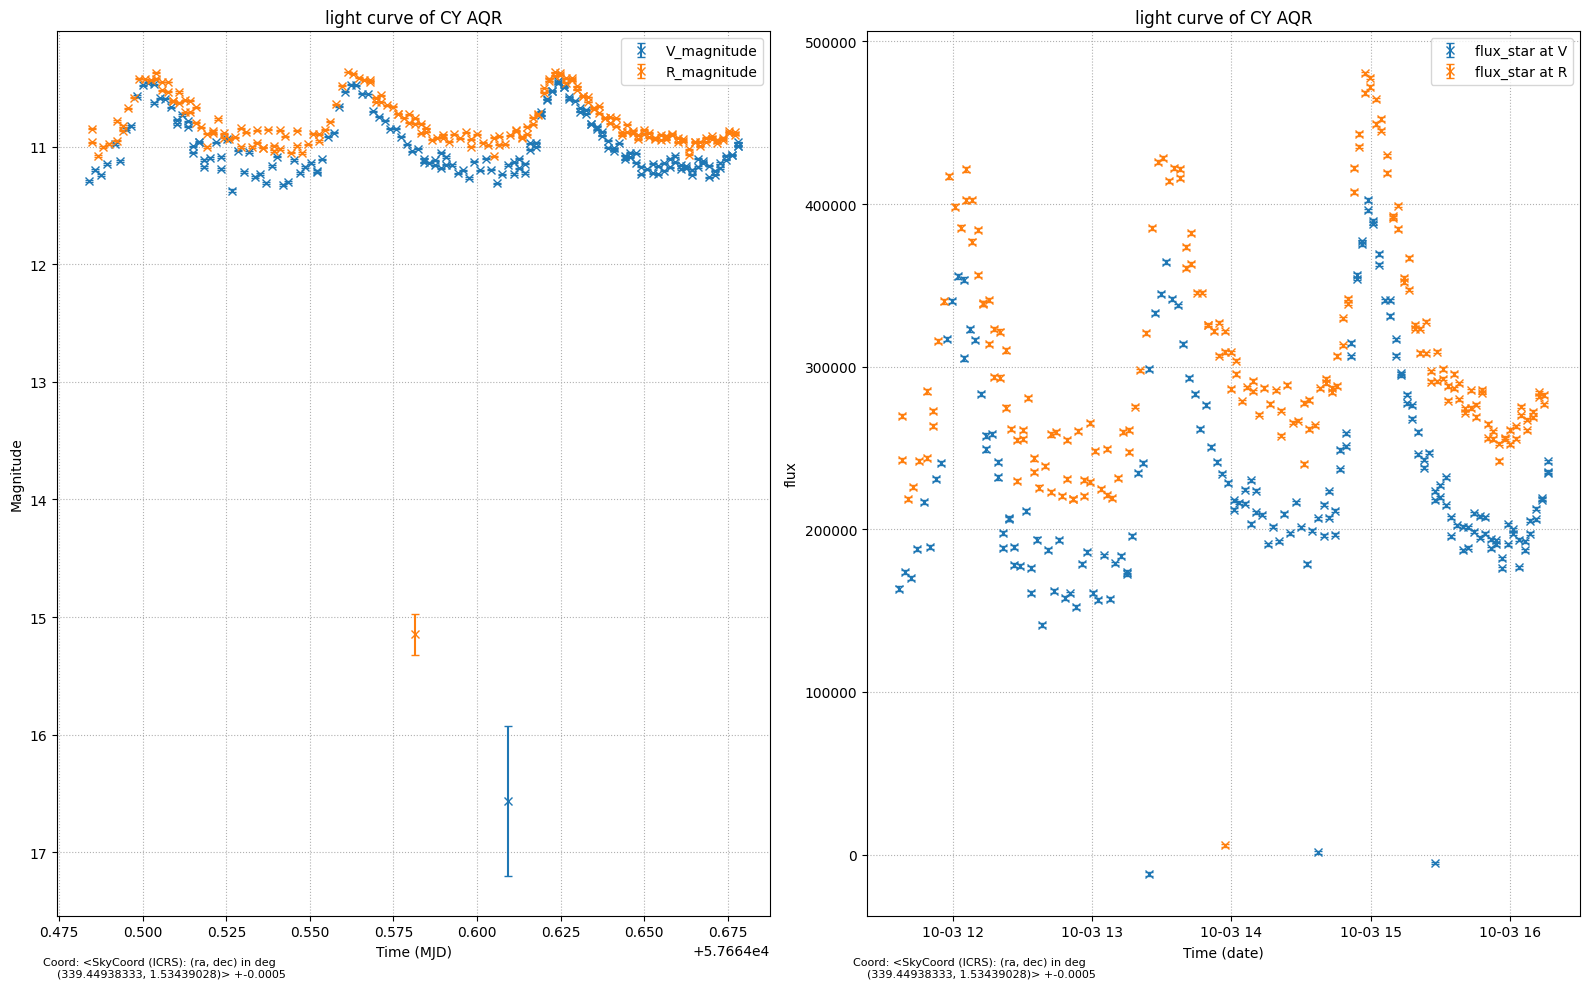

In [20]:
from astropy.time import Time
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(16, 10),
                            sharex=False, sharey=False, gridspec_kw=None)

chls = ['B', 'V', 'R']
for chl in chls :
    # if f'{chl}_magnitude' in df_targ:
    df_targ_chl = df_targ.loc[df_targ["filter"] == chl].copy()
    if not df_targ_chl.empty :
        # print(df_targ_chl)
        # ttime = Time(df_targ_chl["t_middle_dt"])
        im0 = axs[0].errorbar(Time(df_targ_chl["t_middle_dt"]).mjd,
                df_targ_chl[f'{chl}_magnitude'], yerr=abs(df_targ_chl["merr_ann"]),
                marker='x',
                ls='none',
                #ms=10,
                capsize=3,
                label=f'{chl}_magnitude')
        axs[1].errorbar(df_targ_chl["t_middle_dt"],
                df_targ_chl['flux_star'], yerr=abs(df_targ_chl["flux_err"]),
                marker='x',
                ls='none',
                #ms=10,
                capsize=3,
                label=f'flux_star at {chl}')

axs[0].invert_yaxis()

axs[0].set(
    xlabel='Time (MJD)',
    ylabel="Magnitude",
)
axs[0].legend()
axs[0].grid(linestyle=':')

axs[0].set_title(f"light curve of {targ_name}", fontsize=12,)
axs[0].annotate(f'Coord: {targ_sky} +-{coord_delta}', fontsize=8,
            xy=(0, 0), xytext=(-10, -30), va='top', ha='left',
            xycoords='axes fraction', textcoords='offset points')

axs[1].set(
    xlabel='Time (date)',
    ylabel="flux",
)
axs[1].legend()
axs[1].grid(linestyle=':')

axs[1].set_title(f"light curve of {targ_name}", fontsize=12,)
axs[1].annotate(f'Coord: {targ_sky} +-{coord_delta}', fontsize=8,
            xy=(0, 0), xytext=(-10, -30), va='top', ha='left',
            xycoords='axes fraction', textcoords='offset points')

plt.tight_layout()
plt.savefig(f"{fpath.parent}/light_curve_{coord_delta}1.png")

plt.show()

### 광도 곡선2

가로로 길게 광도 곡선을 그려볼 수도 있습니다.

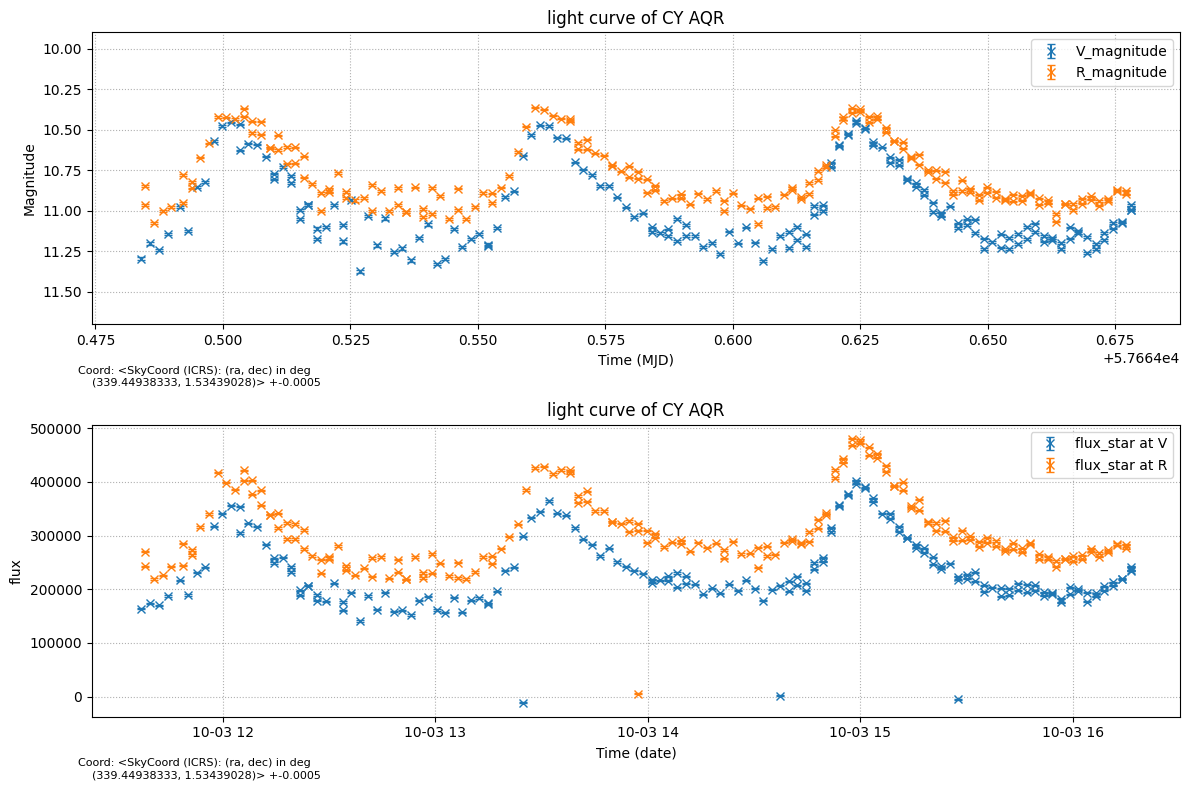

In [21]:
fig, axs = plt.subplots(2, 1, figsize=(12, 8),
                            sharex=False, sharey=False, gridspec_kw=None)

chls = ['B', 'V', 'R']
for chl in chls :
    # if f'{chl}_magnitude' in df_targ:
    df_targ_chl = df_targ.loc[df_targ["filter"] == chl].copy()
    if not df_targ_chl.empty :
        # print(df_targ_chl)
        # ttime = Time(df_targ_chl["t_middle_dt"])
        im0 = axs[0].errorbar(Time(df_targ_chl["t_middle_dt"]).mjd,
                df_targ_chl[f'{chl}_magnitude'], yerr=abs(df_targ_chl["merr_ann"]),
                marker='x',
                ls='none',
                #ms=10,
                capsize=3,
                label=f'{chl}_magnitude')
        axs[1].errorbar(df_targ_chl["t_middle_dt"],
                df_targ_chl['flux_star'], yerr=abs(df_targ_chl["flux_err"]),
                marker='x',
                ls='none',
                #ms=10,
                capsize=3,
                label=f'flux_star at {chl}')

axs[0].invert_yaxis()

axs[0].set(
    xlabel='Time (MJD)',
    ylabel="Magnitude",
    # ylim=(10.8+1, 10.8-1),
    # ylim=(11.25+1.2, 11.25-1.2),
    # ylim=(10.75+.6, 10.75-.6),
    ylim=(10.8+.9, 10.8-.9),
)
axs[0].legend()
axs[0].grid(linestyle=':')

axs[0].set_title(f"light curve of {targ_name}", fontsize=12,)
axs[0].annotate(f'Coord: {targ_sky} +-{coord_delta}', fontsize=8,
            xy=(0, 0), xytext=(-10, -30), va='top', ha='left',
            xycoords='axes fraction', textcoords='offset points')

axs[1].set(
    xlabel='Time (date)',
    ylabel="flux",
)
axs[1].legend()
axs[1].grid(linestyle=':')

axs[1].set_title(f"light curve of {targ_name}", fontsize=12,)
axs[1].annotate(f'Coord: {targ_sky} +-{coord_delta}', fontsize=8,
            xy=(0, 0), xytext=(-10, -30), va='top', ha='left',
            xycoords='axes fraction', textcoords='offset points')

plt.tight_layout()
plt.savefig(f"{fpath.parent}/light_curve_{coord_delta}2.png")

plt.show()